# Data finding

The data from https://data.world/data-society/airplane-crashes is seems to be not full and up-to-date.

I decided to parse data from https://aviation-safety.net/database/databases.php. It is a source of previous one, but it is supporting and up-to-date. 

I used parser, which is included in project directory.



## Uploading data

Data fields in parsed data:

- Date:	 Date of accident,  in the format - January 01, 2001
- Time:	 Local time, in 24 hr. format unless otherwise specified
- location: location of incedent
- Airline/Op:	 Airline or operator of the aircraft
- Flight #:	 Flight number assigned by the aircraft operator
- Route:	 Complete or partial route flown prior to the accident
- AC Type:	 Aircraft type
- Reg:	 ICAO registration of the aircraft
- cn / ln:	 Construction or serial number / Line or fuselage number
- Aboard:	 Total aboard (passengers / crew)
- Fatalities:	 Total fatalities aboard (passengers / crew)
- Ground:	 Total killed on the ground
- Summary:	 Brief description of the accident and cause if known


Data fields in report data:
- year
- fatal accidents per mln flights


In [526]:
import pandas as pd
# import libraries
import altair as alt
import pandas as pd
import numpy as np

# it just needs to be here so we can work with big files 
alt.data_transformers.enable('default', max_rows=None)
# alt.renderers.enable('notebook')

df = pd.read_csv('https://github.com/trokhymovych/data-viz-UCU2019/raw/master/Final_project/data/planecrashinfo_scraping-master/planecrashinfo_20200110102045.csv')
df_report = pd.read_csv('https://github.com/trokhymovych/data-viz-UCU2019/raw/master/Final_project/f.csv', sep = ';')
df_report.fillna(method='ffill', inplace=True)

In [527]:
df.tail(3)

date  time                            location  \
4971  November 24, 2019  0915  Goma, Democratic Republic of Congo   
4972  December 27, 2019  0722                  Almaty, Kazakhstan   
4973   January 08, 2020  0618                 Near Shahriah, Iran   

                            operator flight_no                         route  \
4971                  Busy Bee Congo         ?                   Goma - Beni   
4972                         Bek Air    Z92100  Almaty - Nursultan Nazabavev   
4973  Ukraine International Airlines     PS752                 Tehran - Kiev   

                ac_type registration       cn_ln all_aboard passengers_aboard  \
4971    Dornier 228-201       9S-GNH        8030         19                17   
4972         Fokker 100      UP-F100       11496         98                95   
4973  Boeing 737-8KV WL       UR-PSR  38124/5977        176               167   

     crew_aboard all_fatalities passenger_fatalities crew_fatalities ground  \
4971           2             19                   17               2      7   
4972           3             12                    ?               ?      0   
4973           9            176                  167               9      0   

                                                summary  
4971  The passenger plane crashed about a minute aft...  
4972  While taking off, the tail of the plane struck...  
4973  The plane took off from Tehran International A...

In [524]:
df_report.head(2)

World air traffic (departures)  1 accident \nper x flights  \
0                       9448300.0                    157472.0   
1                       9504500.0                    202223.0   

   fatal accidents \nper mln flights  Year  Unnamed: 4  Unnamed: 5  Unnamed: 6  
0                               6.35  1970         NaN         NaN         NaN  
1                               4.95  1971         NaN         NaN         NaN

In [525]:
df.describe(include='all')

date  time        location  operator flight_no route  \
count                 4974  4974            4974      4974      4974  4974   
unique                4546  1251            4097      2245       887  3805   
top     September 11, 2001     ?  Moscow, Russia  Aeroflot         ?     ?   
freq                     4  1512              17       255      3656   774   

             ac_type registration cn_ln all_aboard passengers_aboard  \
count           4974         4974  4974       4974              4974   
unique          2444         4668  3875        244               233   
top     Douglas DC-3            ?     ?          3                 0   
freq             333          273   668        278               855   

       crew_aboard all_fatalities passenger_fatalities crew_fatalities ground  \
count         4974           4974                 4974            4974   4974   
unique          32            200                  191              29     52   
top              3              1                    0               2      0   
freq           947            383                 1024             885   4690   

       summary  
count     4974  
unique    4816  
top          ?  
freq        63

# Preprocessing data

In [19]:
# clean up all results with no information about passangers and fatalities (drop about 20 records):
df = df[df.all_aboard!='?']
df = df[df.all_fatalities!='?']

#### Getting longtitude and latitude from location string using Google Geocoding API

In [20]:
# import googlemaps
# import numpy as np
# API_KEY = 'XXXXXXXXXXX'
# gmaps = googlemaps.Client(key=API_KEY)

# def get_coordinates(address):
#     geocode_result = gmaps.geocode(str(address))
#     if len(geocode_result) > 0:
#         return list(geocode_result[0]['geometry']['location'].values())
#     else:
#         return [np.NaN, np.NaN]

In [21]:
# coordinates = df['location'].apply(lambda x: pd.Series(get_coordinates(x), index=['LATITUDE', 'LONGITUDE']))
# df2 = pd.concat([df[:], coordinates[:]], axis="columns")

In [528]:
# df2.to_csv('df_with_location.csv', index = False)
df2 = pd.read_csv('https://github.com/trokhymovych/data-viz-UCU2019/raw/master/Final_project/df_with_location.csv')
df2.date = pd.to_datetime(df2.date)
df2 = df2[df2.date>pd.datetime(year = 1970, month = 1, day = 1)]

## Dynamic of number of crashes in time
## Crash trend
Here is three plots are combined into a grid view to observe the trend in the fatal flights ratio over the years and also total numbers of accidents by the months and day of the week in particular. A trend line of crashes ratio per year shows that the probability of accident in the air is decreasing from year to year.

The monthwise analysis just gives a confirmation that crashes occur irrespective of the month and day of the week. That means, the time of the year is not significant influencing parameter.

In [354]:
# configurations
Blue = "#69b8d6"
Red = '#d53e4f'
Gray = '#5D646F'
Grid = '#5D646F'
background = '#F3F7F7'
# font = 'Ubuntu Mono'
font = 'Helvetica Neue'

# customizing main Axes 
axisX = alt.Axis(gridDash = [0,2,0], 
                 values = [1970,1980,1990,2000,2010,2019],
                 grid=True, 
                 domain=False, 
                 tickDash=[0,2,0],
                 tickColor = 'lightgray',
                 labelAngle =0,
                 labelColor = Gray,
                 labelFont = font,
                 labelFontSize = 13,
                 labelPadding = 15,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0,
                 titleY =  -5,
                 titleX = 770)

axisY = alt.Axis(values = [i for i in range(1, 7)],
                 gridDash = [0,2,0], grid=True,  
                 domain=False, 
                 ticks=False,
                 labelAngle =0,
                 labelColor = Gray,
                 labelFontSize = 13,
                 labelFont = font,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0,
                 titleY =  -10,
                 titleX = 90)

# axes for text
ax2 = alt.Axis(grid=False, domain=False, ticks=False, labelColor="transparent") 

In [355]:
chart1 = alt.Chart(df_report, title = 'Dynamic of fatal flights rate').mark_line(opacity = 0.8, point=True).encode(
    x = alt.X('Year:N', title = 'year', axis = axisX),
    y = alt.Y('fatal accidents \nper mln flights:Q', title = 'Fatal accidents per million flights', axis = axisY), #title = 'Number of reviews'
    color = alt.value(Red),
    tooltip = alt.Tooltip(['fatal accidents \nper mln flights', 'Year'])
).properties(width=800, height=250)

# footer
text_df_footer = pd.DataFrame({'text':['Data: the Aviation Safety Network database (http://aviation-safety.net)']})
footer = alt.Chart(text_df_footer).mark_text(fontSize=13, font=font, color = Gray, dx = 800/2, align = 'right').encode(
    text='text').properties(width=800, height=20)

In [356]:
axisX2 = alt.Axis(gridDash = [0,2,0], 
                 grid=False, 
                 domain=False, 
                 labels = False,
                 ticks = False,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0)

axisY2 = alt.Axis(
                 gridDash = [0,2,0], grid=True,  
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = Gray,
                 labelFontSize = 13,
                 labelFont = font,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0, titleY = -10, titleX = 130)



d = df2.groupby(df2['date'].dt.strftime('%B'))[['location']].count()
new_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d['month'] = df3.index

# total number of crashes per month
hist1 = alt.Chart(d).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('month:O', title = None, scale=alt.Scale(zero=False), sort = new_month, axis = axisX2),
    y=alt.Y('location:Q', title = 'Total number of accidents by month', axis = axisY2),
    color = alt.value(Blue)
).properties(width=370, height=170)

text = hist1.mark_text(
    align='left',
    baseline='middle',
    font = font,
    color = background,
    angle = 360 - 90,
    fontSize=16
).encode(
    y = alt.value(160),
    text=alt.Text('month'),
    color = alt.value(background)
)
hist1 = hist1+text

In [357]:
axisY2 = alt.Axis(
                 gridDash = [0,2,0], grid=True,  
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = Gray,
                 labelFontSize = 13,
                 labelFont = font,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0, titleY = -10, titleX = 150)

d = df2.groupby(df2['date'].dt.strftime('%A'))[['location']].count()
new_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
d['month'] = d.index

# total number of crashes per month
hist2 = alt.Chart(d).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('month:O', title = None, scale=alt.Scale(zero=False), sort = new_day, axis = axisX2),
    y=alt.Y('location:Q', title = 'Total number of accidents by day of week', axis = axisY2),
    color = alt.value(Blue)
).properties(width=370, height=170)

text = hist2.mark_text(
    align='left',
    baseline='middle',
    font = font,
    color = background,
    angle = 360 - 90,
    fontSize=16
).encode(
    y = alt.value(160),
    text=alt.Text('month'),
    color = alt.value(background)
)
hist2 = hist2+text

In [358]:
(chart1&(hist1|hist2)&footer).configure(background=background,  padding={"left": 40, "top": 30, "right": 40, "bottom": 30}
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).configure_title(fontSize=30, 
                  color = Gray, 
                  font=font,
                  fontWeight = 600,
                  anchor = 'start'
)



alt.VConcatChart(...)

**Here is three plots are combined into a grid view to observe the trend in the fatal flights ratio over the years and also total numbers of accidents by the months and day of the week in particular. A trend line of crashes ratio per year shows that the probability of accident in the air is decreasing from year to year.**

**The monthwise analysis just gives a confirmation that crashes occur irrespective of the month and day of the week. That means, the time of the year is not significant influencing parameter.**

# Which airlines are the most dangerous?
To understand which operators caused more crashes the data is grouped by the operator and arranged in a descending format of the frequency. The graph has been plotted to observe the top 10 operators that caused the aircrash.

In [518]:
print('There is interactive legend that enable to filter only civil or military airlines')

# data aggregation
Temp = df2.copy()
Temp['isMilitary'] = Temp.operator.str.contains('Military')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Civil', 'Military']
Temp['type'] = Temp.index
Temp['isMilitary_b'] = [False, True]
domain = ['Civil', 'Military']
range_ = [Blue, Red]
# Number of NaNs in specific fields
df2.loc[df2.operator == 'Military - U.S. Air Force', 'operator'] = 'Military - U.S. Army'
grouping_all = df2.groupby('operator').count().sort_values('date', ascending = False)[['date']]
grouping_all = grouping_all
grouping_all['operator'] = grouping_all.index
grouping_all['isMilitary_b'] = grouping_all.operator.str.contains('Military')

# making interactive legend
selection = alt.selection_single(fields=['isMilitary_b'])
hist2 = alt.Chart(Temp).mark_bar().encode(
    y=alt.Y('isMilitary:Q', title = None, axis = ax2),
    color=alt.Color('type', scale=alt.Scale(domain=domain, range=range_), legend = None),
    opacity = alt.condition(selection, alt.value(0.9), alt.value(0.15))
).properties(height=280)

# annotations to the legend
text = hist2.mark_text(
    align='left',
    baseline='middle',
    font = font,
    color = Gray,
    fontSize=14,
    dx = 20, dy = 30
).encode(
    text=alt.Text('isMilitary'),
    color = alt.value( Gray)
).properties(height=280)

text2 = hist2.mark_text(
    align='left',
    baseline='middle',
    font = font,
    color = Gray,
    fontSize=14,
    dx = 20, dy = 10
).encode(
    text=alt.Text('type'),
    color = alt.value(Gray)
).properties(height=280)


domain = ['Civil', 'Military']
range_ = ['transparent', 'transparent']
# tem = alt.Chart(Temp).mark_bar(color = 'transparent').encode(color = alt.Color('isMilitary',scale=alt.Scale(domain=domain, range=range_),legend = None)).properties(height=40)

title_color = Gray
text_color = Gray
text_size = 14

# axes
axisY = alt.Axis(grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = text_color,
                 labelFontSize = text_size,
                 labelFontWeight = 400,
                 labelFont = font,
                 labelPadding = 5,
                 )
# axes
axisX = alt.Axis(values = [20,40, 60,80, 100,120, 140],
                 grid=True, 
                 gridDash = [0,2,0],
                 domain=False, 
                 ticks=False,
                 labelAngle =0,
                 labelColor = text_color,
                 labelFontSize = text_size-2,
                 labelFontWeight = 400,
                 labelFont = font,
                 titleColor = text_color,
                 titleFontSize = text_size-2,
                 titleFontWeight = 400,
                 titleFont = font,
                 labelPadding = 10,
                 titlePadding = 20
                 )

# make maersk_an red
domain = list(grouping_all['operator'])
range_ = [Red if j else Blue for i,j in zip(range(len(domain)), list(grouping_all['isMilitary_b']))]

# title
title_text = 'Total number of crashes by airline'
text_df_footer = pd.DataFrame({'text':[title_text]})
title = alt.Chart(text_df_footer).mark_text(fontWeight = 200, fontSize=24, font=font, color = title_color,align = 'center' ,dx = -10).encode(
    text='text').properties(width=500, height=40)

chart = alt.Chart(grouping_all).mark_bar(opacity = 0.9, cornerRadiusBottomRight=5, cornerRadiusTopRight=5).encode(
    y = alt.Y('operator:N', title = None, sort = alt.Sort(field = 'date', order='descending'), axis = axisY),
    x = alt.X('date:Q', title = None, scale=alt.Scale(zero=False, domain = [0,145]), axis = axisX),
    color = alt.Color('operator', legend=None,
                      scale=alt.Scale(domain=domain, range=range_)),
).properties(width = 500, height = 300
).transform_filter(selection).transform_window(
    rank='rank(date)',
    sort=[alt.SortField('date', order='descending')]
).transform_filter(
    alt.datum.rank < 10
)

text3 = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    font = font,
    fontSize = 12
).encode(
    text=alt.Text('date'),
    color = alt.value('#5D646F')
).properties(width = 500, height = 500)

hist2 = title&((chart+text3)|((hist2+text+text2)))&footer
hist2 = hist2.add_selection(selection)

(hist2).configure(background=background,  padding={"left": 40, "top": 30, "right": 40, "bottom": 30}
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
)



There is interactive legend that enable to filter only civil or military airlines


alt.VConcatChart(...)

**To understand which operators caused more crashes the data is grouped by the operator and arranged in a descending format of the frequency. The graph has been plotted to observe the top 10 operators that caused the aircrash.**

**Aeroflot seems to be the most dangerous civil airline. Howewer, it is left in USSA.**. 

# How air safety depends on region/airline?
The Location which was cleaning using string operations, is used here. The data is grouped by the location and the total fatalities for each location is calculated. 

It is observed that Russia has had the maximum crashes out of all the Countries.

Plot the worldmap

# What are the most frequent/anomaly causes of crashes?
Description
Here I have experimented with text mining in R on the summary column to form a word cloud that states the reasons for aircrash.
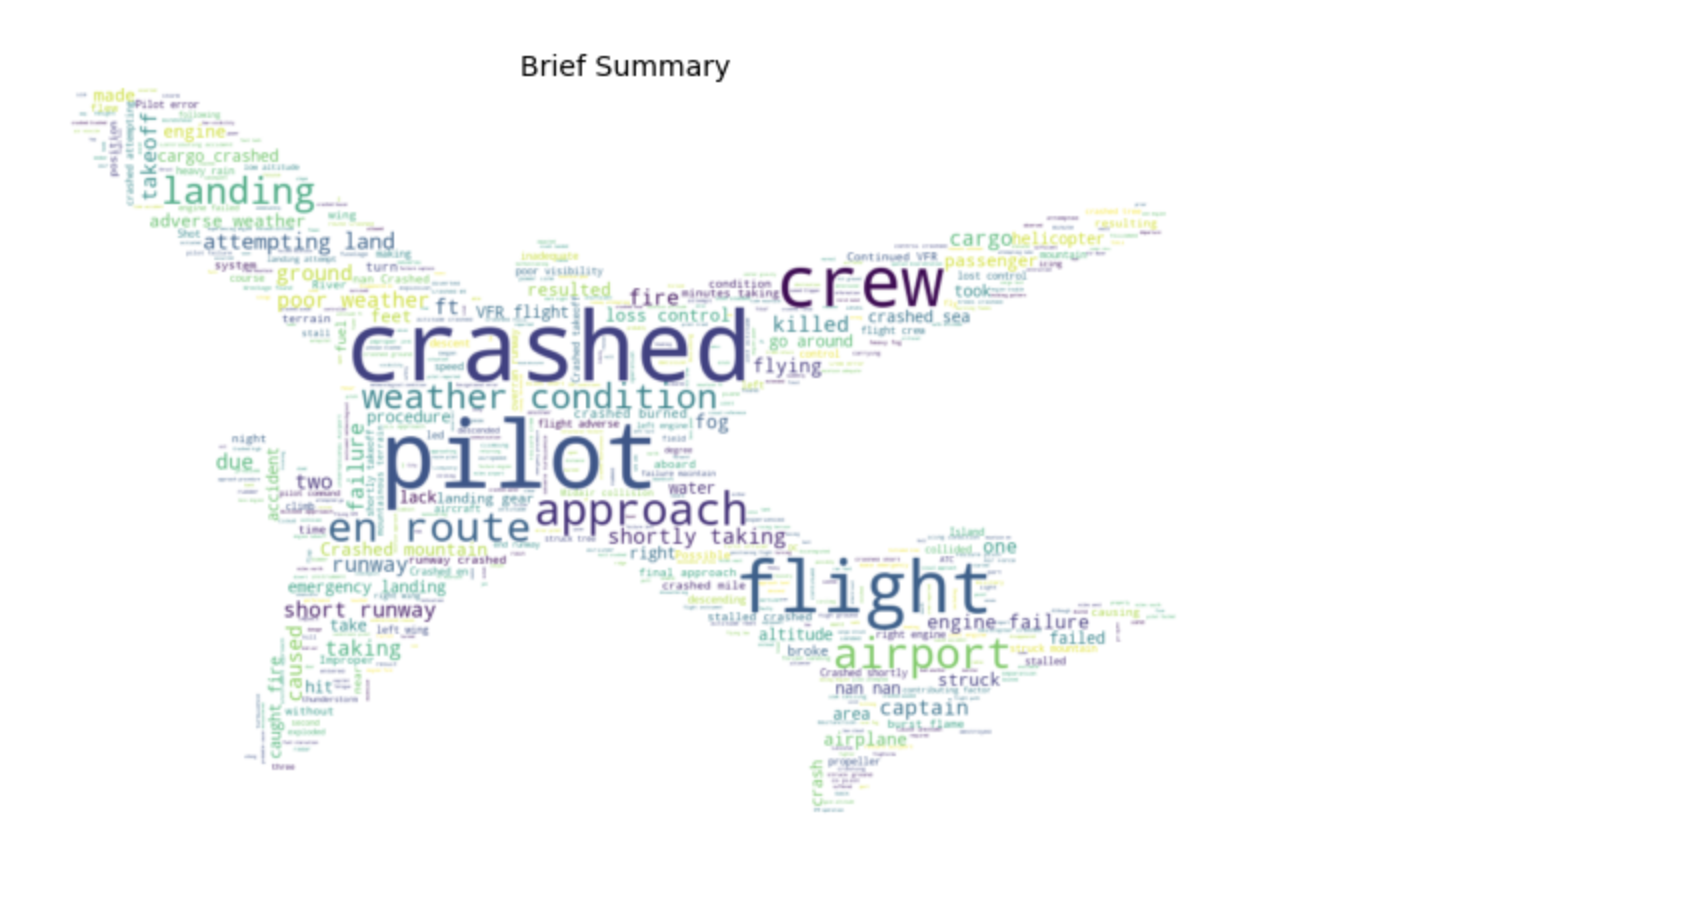

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(list(df2.summary))

plane_mask = np.array(Image.open('../input/plane-symb/aircraft-1293790_960_720.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

### How route influence the probability of crashes? What is the top dangerous routes/destinations?

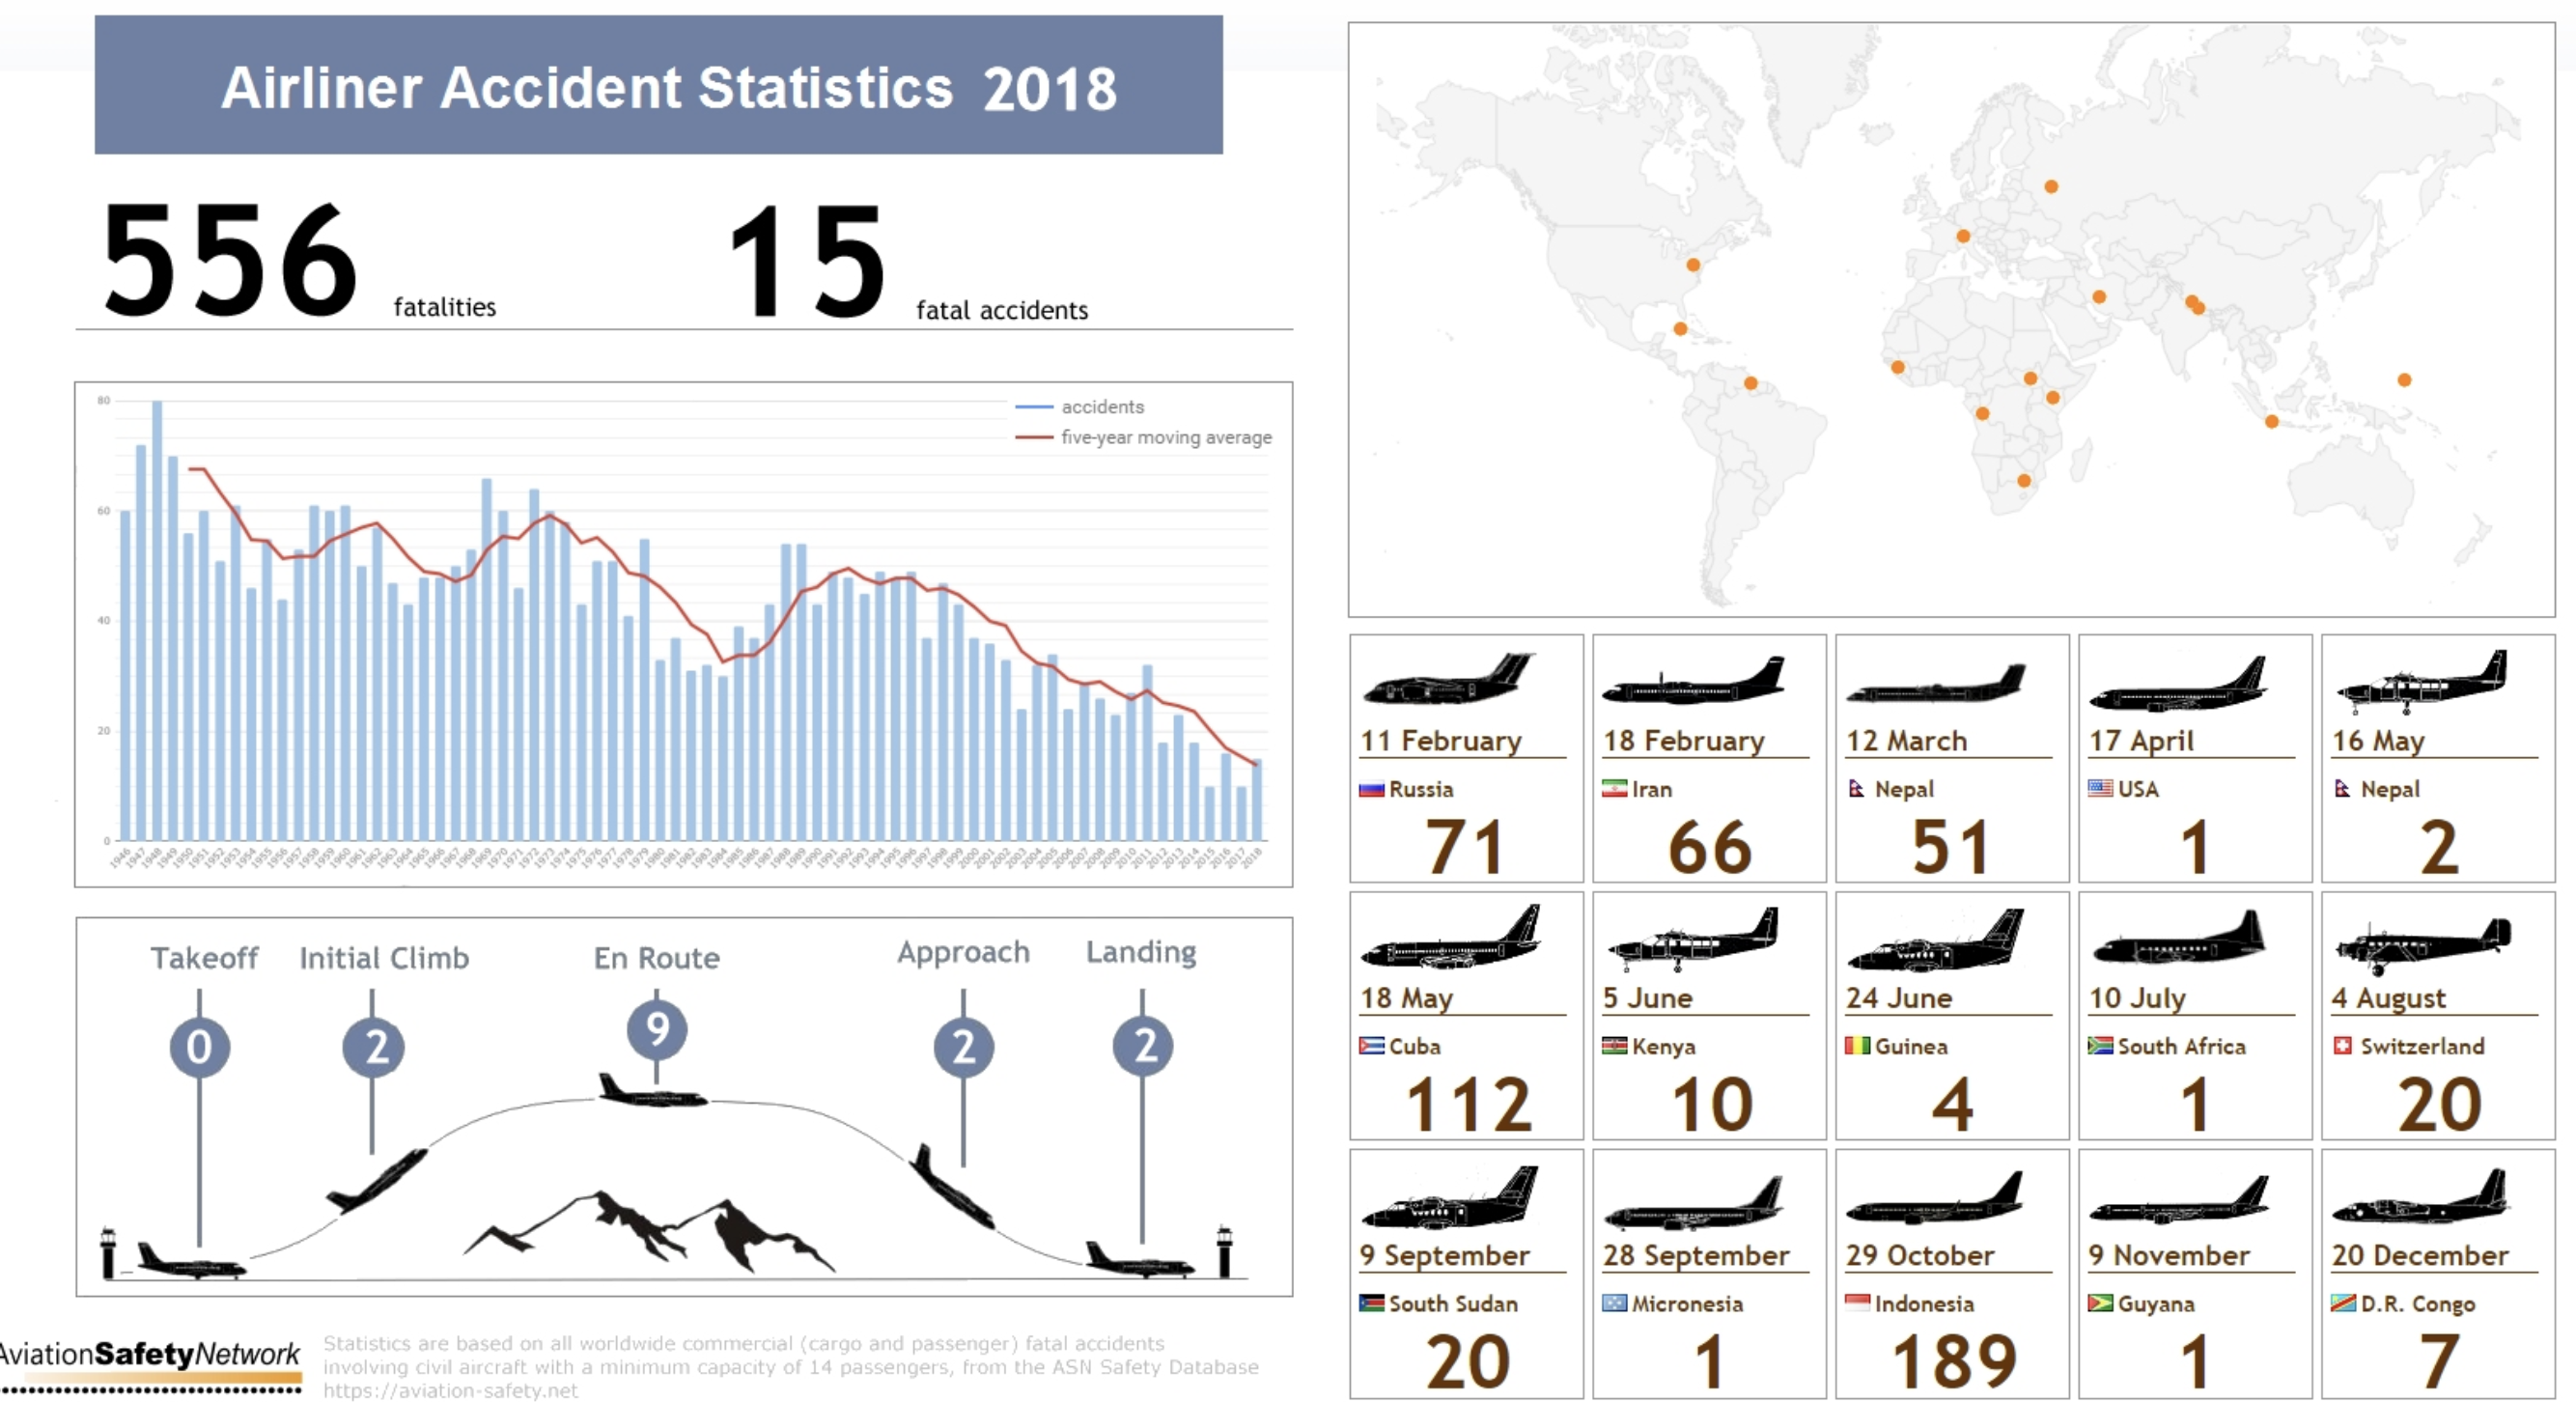

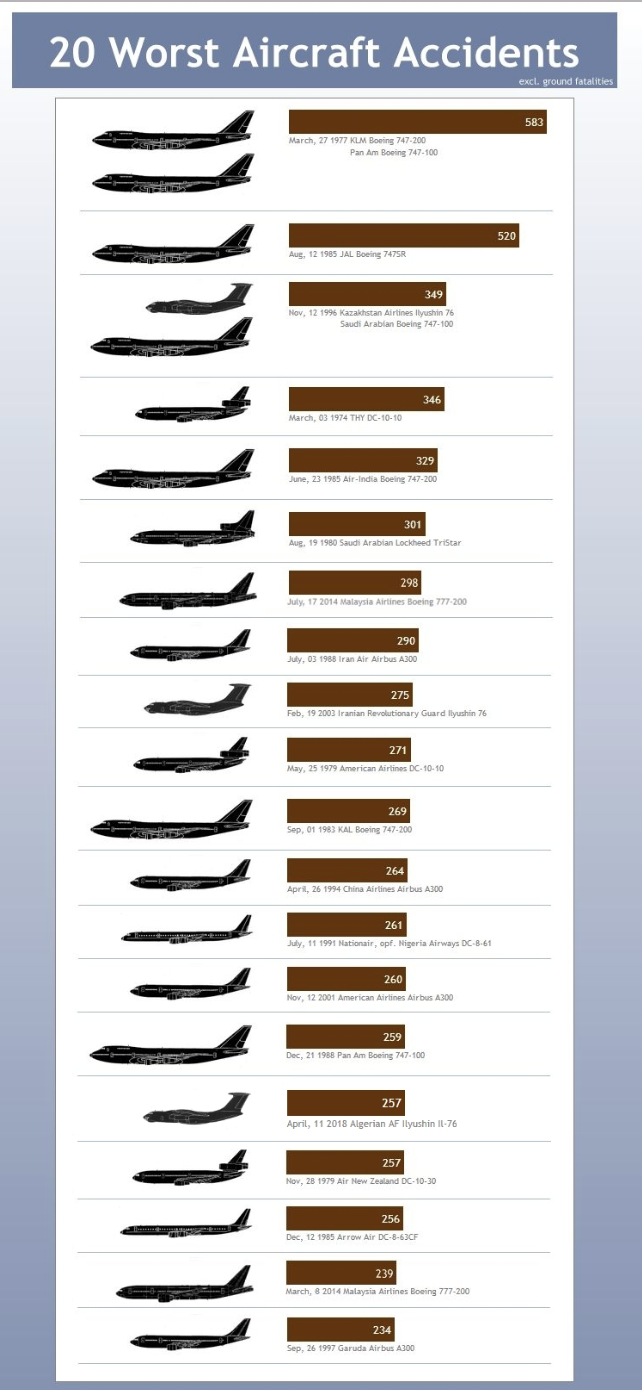

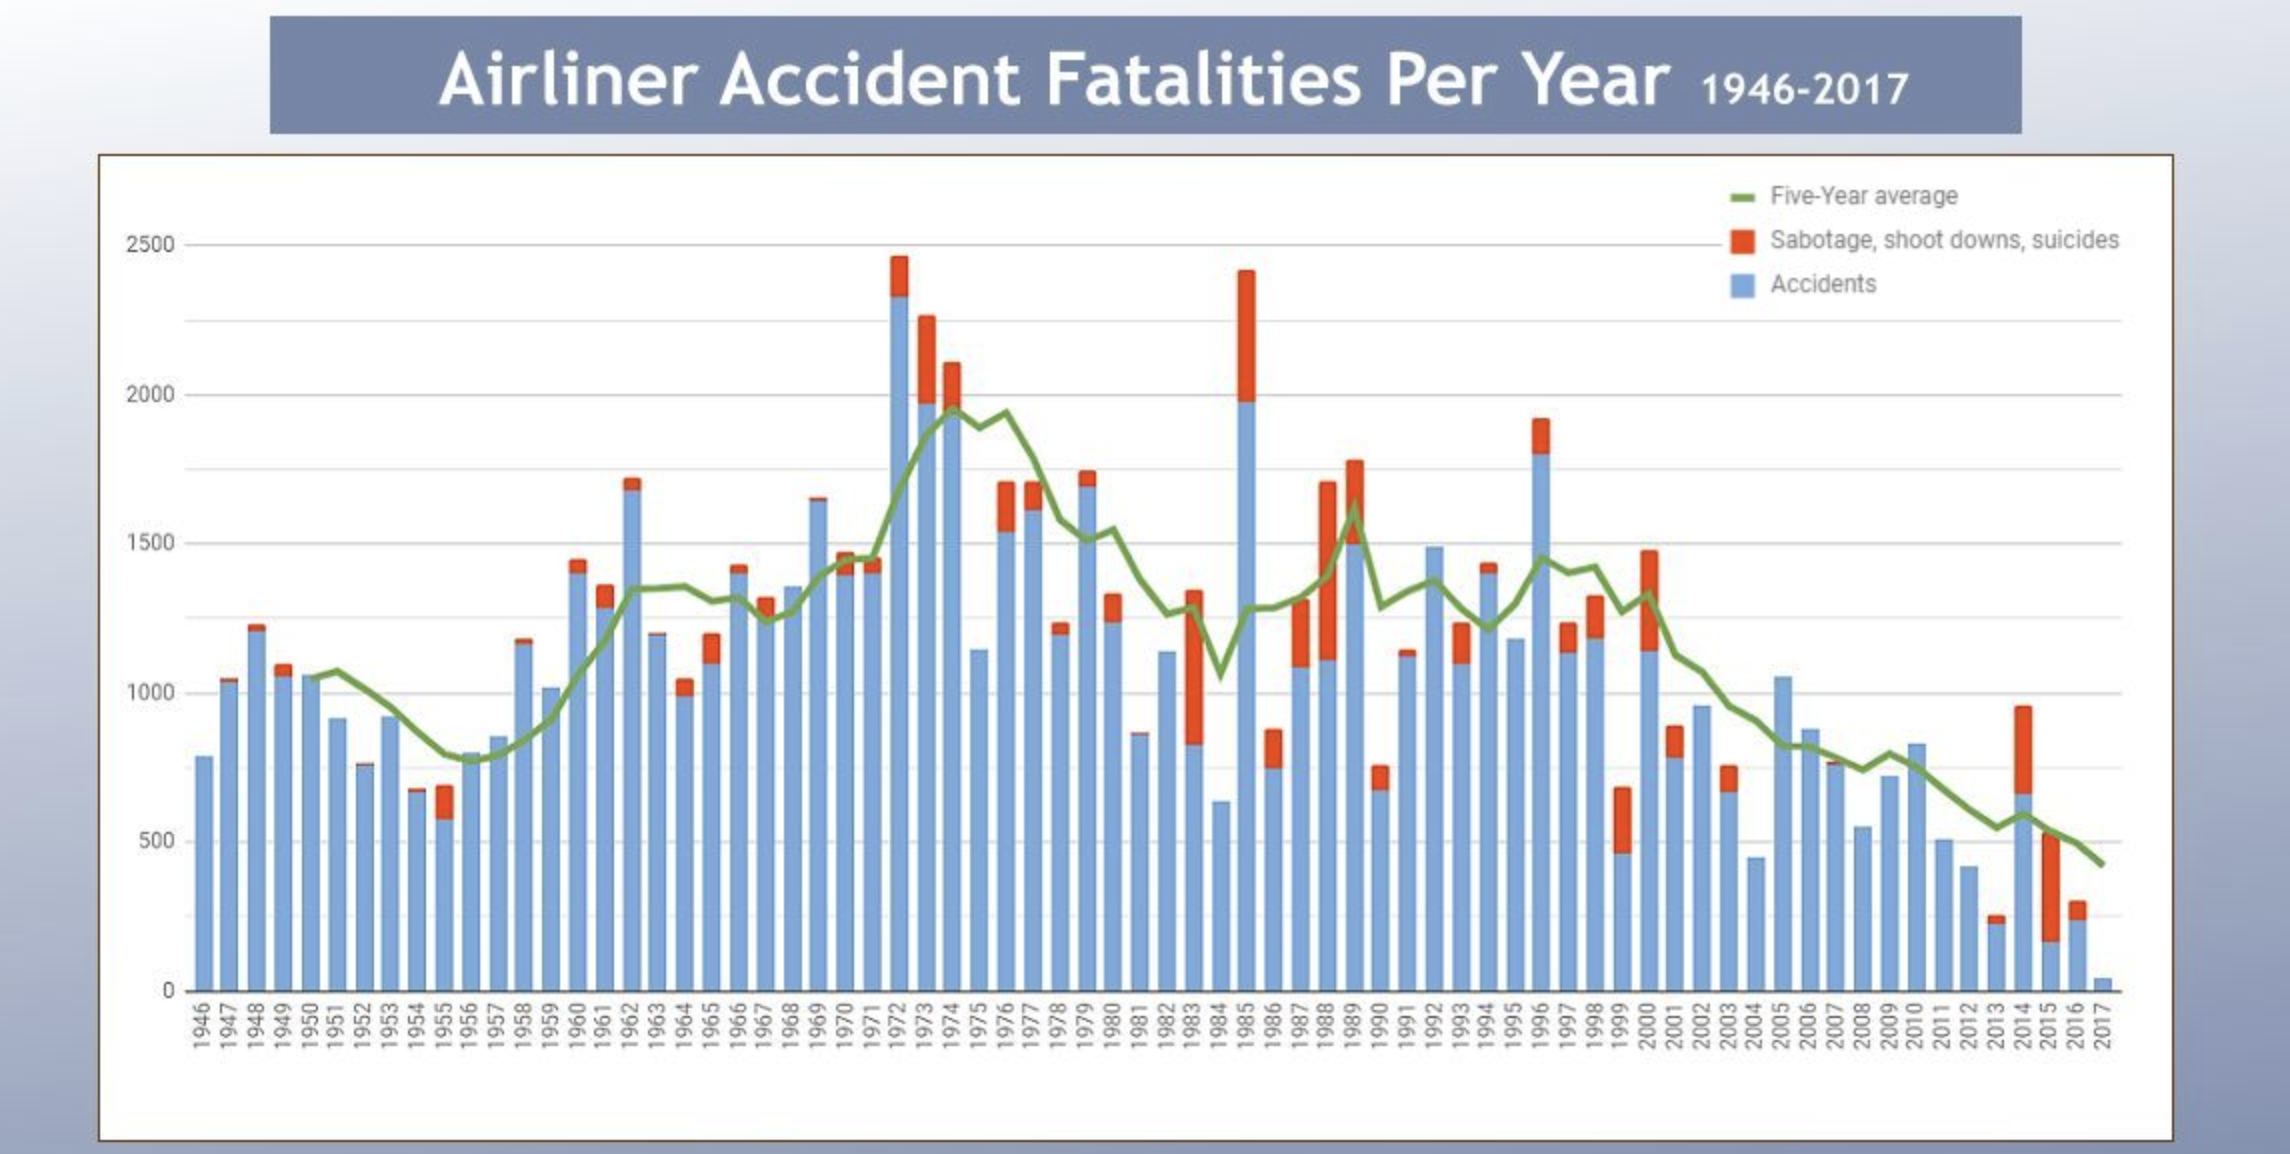